# Indicator Notebook

In [19]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [113]:
def draw_graph(G, title, ax=None):
    pos = nx.kamada_kawai_layout(G, weight='length')
    if ax is None:
        plt.figure(figsize=(10, 8))

    # Draw nodes and labels
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue", ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold", font_color="black", ax=ax)

    # Color edges based on the 'bikes' attribute
    edata = list(G.edges(data=True))
    edgelist = [(u, v) for u, v, _ in edata]
    edge_colors = [
        "tab:green" if d.get("bikes", d.get("bike", False)) else "lightgray"
        for _, _, d in edata
    ]
    nx.draw_networkx_edges(
        G, pos, edgelist=edgelist, width=2, alpha=0.6, edge_color=edge_colors, arrows=True, arrowsize=20, ax=ax
    )

    # Edge labels for weights (travel time)
    edge_labels = nx.get_edge_attributes(G, 'length')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, ax=ax)
    if ax is None:
        plt.title(title)
        plt.axis("off")
        plt.show()
    else :
        ax.set_title(title)
        ax.axis("off")
    

In [211]:
def city_graph_generator (capacity, graph_number):
    G = nx.Graph()
    if graph_number == 1:
        G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"])
        edges = [
            ("A", "B", 10,capacity, True),
            ("A", "C", 5, capacity, True),
            ("B", "D", 2,capacity, True),
            ("C", "D", 2,capacity, True),
            ("D", "E", 3,capacity, True),
            ("E", "F", 4,capacity, True),
            ("F", "G", 6,capacity, True),
            ("E", "G", 7,capacity, False),
            ("C", "E", 5, capacity, False),
            ("A", "F", 15,capacity, True),
            ("B", "H", 4, capacity, False),
            ("K", "A", 4,capacity, False),
            ("H", "I", 3,capacity, True),
            ("I", "J", 4,capacity, True),
            ("J", "K", 5,capacity, True),
            ("I", "K", 5,capacity, True)]
    elif graph_number == 2 :
        G.add_nodes_from(list("ABCDEFGHIJKLMNOP")[:11]) # 11 nodes A-K
        edges = [
            ("A", "B", 5, capacity, True),
            ("A", "D", 9, capacity, True),
            ("B", "C", 3, capacity, False),
            ("C", "D", 2, capacity, True),
            ("B", "E", 6, capacity, True),
            ("E", "F", 5, capacity, False),
            ("D", "F", 7, capacity, True),
            ("F", "G", 4, capacity, True),
            ("G", "H", 6, capacity, True),
            ("H", "I", 5, capacity, True),
            ("I", "J", 4, capacity, False),
            ("J", "K", 5, capacity, True),
            ("G", "K", 7, capacity, False),
            ("D","E", 14, capacity, False)
        ]
    elif graph_number == 3 :
        G.add_nodes_from(list("ABCDEFGHIJK"))
        edges = [
            ("A", "C", 7, capacity, True),
            ("A", "B", 4, capacity, True),
            ("B", "D", 3, capacity, True),
            ("C", "D", 6, capacity, False),
            ("B", "E", 8, capacity, True),
            ("D", "F", 5, capacity, True),
            ("E", "G", 9, capacity, False),
            ("F", "G", 3, capacity, True),
            ("C", "H", 6, capacity, True),
            ("H", "I", 4, capacity, False),
            ("I", "J", 5, capacity, True),
            ("J", "K", 6, capacity, True),
            ("G", "K", 7, capacity, False),
        ]
    elif graph_number == 4 :
        G.add_nodes_from(list("ABCDEFGHIJK"))
        edges = [
            ("A", "B", 6, capacity, True),
            ("B", "C", 4, capacity, True),
            ("A", "D", 7, capacity, False),
            ("C", "D", 5, capacity, False),
            ("C", "E", 8, capacity, False),
            ("D", "F", 6, capacity, True),
            ("E", "F", 7, capacity, True),
            ("E", "G", 4, capacity, True),
            ("G", "H", 6, capacity, True),
            ("H", "I", 3, capacity, False),
            ("I", "J", 5, capacity, True),
            ("J", "K", 6, capacity, False),
            ("G", "K", 8, capacity, True)
        ]
    elif graph_number == 5 :
        G.add_nodes_from(list("ABCDEFGHIJK"))
        edges = [
            ("A", "C", 5, capacity, True),
            ("A", "B", 3, capacity, True),
            ("B", "D", 4, capacity, False),
            ("C", "D", 6, capacity, True),
            ("B", "E", 7, capacity, True),
            ("D", "F", 5, capacity, True),
            ("E", "G", 8, capacity, False),
            ("F", "G", 4, capacity, True),
            ("C", "H", 6, capacity, False),
            ("H", "I", 5, capacity, False),
            ("I", "J", 4, capacity, True),
            ("J", "K", 6, capacity, True),
            ("G", "K", 7, capacity, False),
            ("D", "J", 10, capacity, True),
            ("E", "F", 3, capacity, True),
            ("F", "J", 6, capacity, True)
        ]
    elif graph_number == 6:
        G.add_nodes_from(list("ABCDEFGHI"))
        edges = [
            ("A", "B", 4, capacity, False),
            ("B", "C", 4, capacity, False),
            ("A", "D", 6, capacity, True),
            ("B", "E", 6, capacity, False),
            ("C", "F", 6, capacity, True),
            ("E", "D", 4, capacity, False),
            ("E", "F", 4, capacity, True),
            ("D", "G", 6, capacity, True),
            ("D", "H", 7, capacity, False),
            ("H", "E", 6, capacity, False),
            ("G", "H", 4, capacity, False),
            ("F", "E", 4, capacity, True),
            ("F", "I", 6,capacity, True),
            ("I", "H", 4, capacity, True)
        ]
    G.add_edges_from([(u, v, {"length": w, "capacity": c, "flow": 0, "bikes": b}) for u, v, w, c, b in edges])
    return G

In [144]:
def extract_bike_friendly_subgraph(G):
    bike_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get("bikes", d.get("bikes", False))]
    return G.edge_subgraph(bike_edges).copy()

In [220]:
def network_size(G, bikes_only=False):
    if bikes_only:
        return sum(data['length'] for _,_,data in extract_bike_friendly_subgraph(G).edges(data=True))
    return sum(data['length'] for _, _, data in G.edges(data=True))

def network_granularity(G, bikes_only=False):
    if bikes_only:
        lengths = [data['length'] for _,_,data in extract_bike_friendly_subgraph(G).edges(data=True)]
    else:
        lengths = [data['length'] for _, _, data in G.edges(data=True)]
    return np.mean(lengths)

def network_coverage(G):
    total_length = network_size(G)
    bike_length = network_size(G, bikes_only=True)
    if total_length == 0:
        return 0
    return bike_length / total_length

def network_centrality_degree(G):
    centrality = nx.degree_centrality(extract_bike_friendly_subgraph(G))
    return max(centrality.values()) / np.mean(list(centrality.values()))

def network_centrality_betweeness(G, weight="length"):
    centrality = nx.betweenness_centrality(extract_bike_friendly_subgraph(G), weight=weight, normalized=True)
    return max(centrality.values()) / np.mean(list(centrality.values()))

def network_fragmentation_num(G):
    bike_subgraph = extract_bike_friendly_subgraph(G)
    num_components = nx.number_connected_components(bike_subgraph)
    return num_components

def network_fragmentation_sizes(G):
    bike_subgraph = extract_bike_friendly_subgraph(G)
    components = nx.connected_components(bike_subgraph)
    sizes = sorted([round(network_size(bike_subgraph.subgraph(c))/network_size(G),3) for c in components], reverse=True)
    return sizes

def network_connectivity(G):
    connectivity = []
    bike_subgraph = extract_bike_friendly_subgraph(G)
    for u in bike_subgraph.nodes():
        connectivity.append(bike_subgraph.degree(u) / G.degree(u) if G.degree(u) > 0 else 0)
    return np.mean(connectivity)

def network_density_1(G):
    bike_subgraph = extract_bike_friendly_subgraph(G)
    mean_length = np.mean([data['length'] for _,_,data in bike_subgraph.edges(data=True)])
    return mean_length/network_size(G)

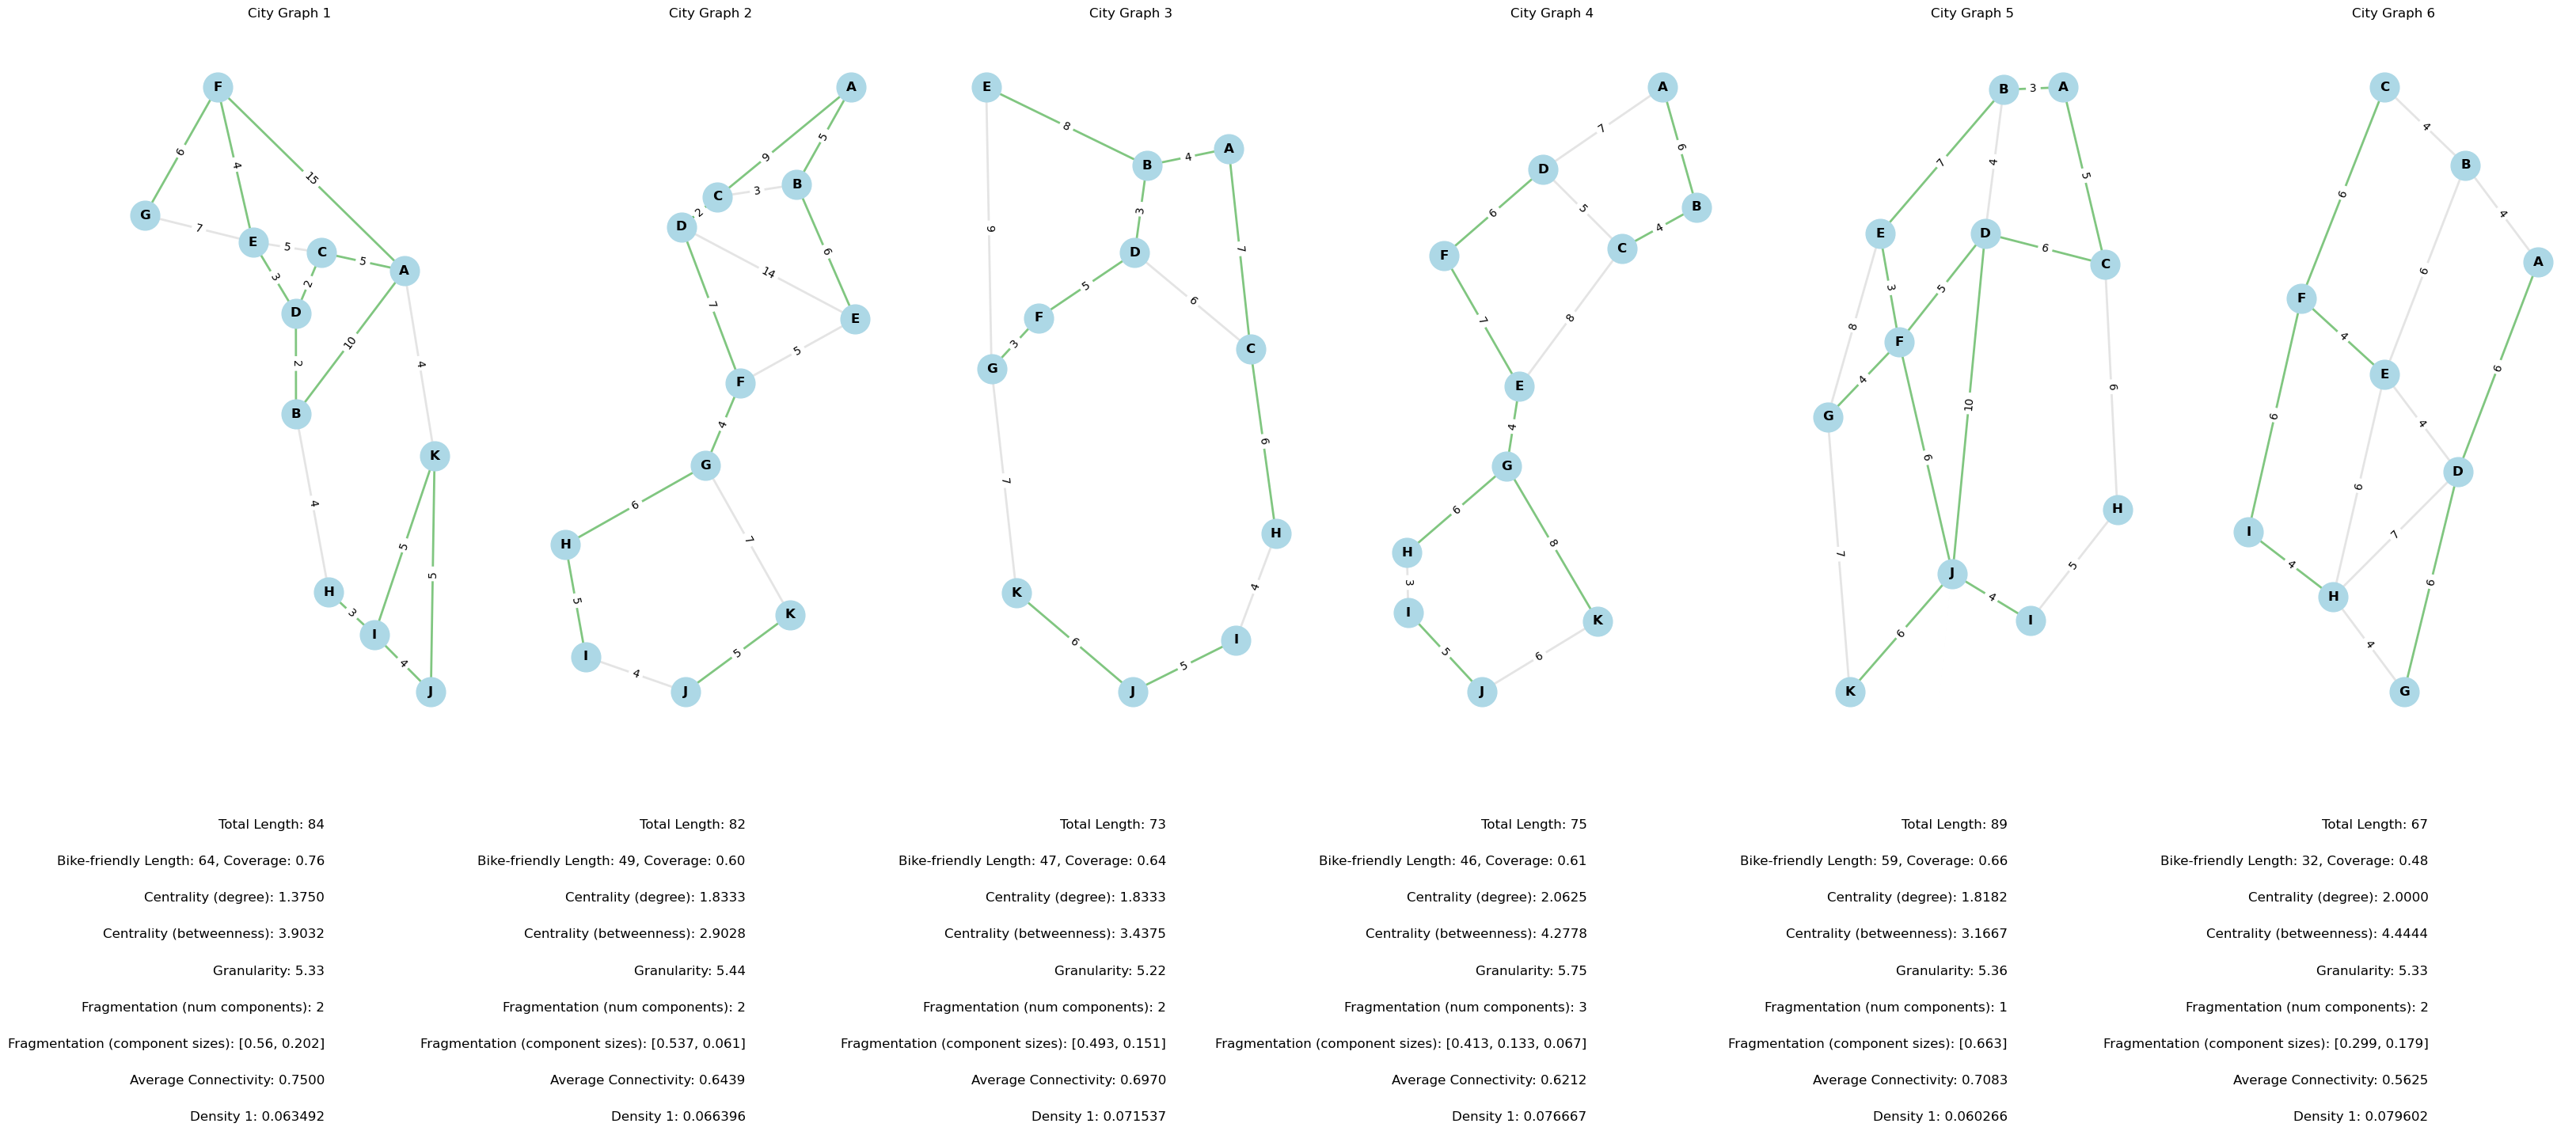

In [221]:
fig, ax = plt.subplots(1, 6, figsize=(40, 12))
for i in range(1,7):
    G = city_graph_generator(10, i)
    draw_graph(G, f"City Graph {i}", ax=ax[i-1])
    ax[i-1].text(0.6, -0.1, f"Total Length: {network_size(G)}", size=12, ha="right", transform=ax[i-1].transAxes)
    ax[i-1].text(0.6, -0.15, f"Bike-friendly Length: {network_size(G, bikes_only=True)}, Coverage: {network_coverage(G):.2f}", size=12, ha="right", transform=ax[i-1].transAxes)
    ax[i-1].text(0.6, -0.2, f"Centrality (degree): {network_centrality_degree(G):.4f}", size=12, ha="right", transform=ax[i-1].transAxes)
    ax[i-1].text(0.6, -0.25, f"Centrality (betweenness): {network_centrality_betweeness(G):.4f}", size=12, ha="right", transform=ax[i-1].transAxes)
    ax[i-1].text(0.6, -0.30, f"Granularity: {network_granularity(G, bikes_only=True):.2f}", size=12, ha="right", transform=ax[i-1].transAxes)
    ax[i-1].text(0.6, -0.35, f"Fragmentation (num components): {network_fragmentation_num(G)}", size=12, ha="right", transform=ax[i-1].transAxes)
    ax[i-1].text(0.6, -0.40, f"Fragmentation (component sizes): {network_fragmentation_sizes(G)}", size=12, ha="right", transform=ax[i-1].transAxes)
    ax[i-1].text(0.6, -0.45, f"Average Connectivity: {network_connectivity(G):.4f}", size=12, ha="right", transform=ax[i-1].transAxes)
    ax[i-1].text(0.6, -0.50, f"Density 1: {network_density_1(G):.6f}", size=12, ha="right", transform=ax[i-1].transAxes)